# NOTEBOOK 11 More on ndarrays
---

## Multidimensional arrays

You already worked with numpy arrays. So far only with 1 dimensional (1D) arrays. For example to create an array with zeros of length 10 we use:


In [ ]:
import numpy as np

a = np.zeros(10)
print(a)

In the same way we can alse define multidimensional arrays. To create a 2D array with 5 rows and 4 columns filled with zeros you use:

In [ ]:
a = np.zeros((5, 4))
print(a)

Important to note is that you first specify the number of rows (numpy refers to this as axis 0) and then the number of columns (axis 1). This is used also in indexing and slicing. If we want to change the value at the third row (index 2) and first column (index 0) you need to specify first the index of the row followed by a comma and then the index of the column:

In [ ]:
a[2, 0] = 42
print(a)

You can check the shape of the array by using the array's attribute `shape`:

In [ ]:
a.shape

Slicing works in a similar way. You can for example slice a row from a 2D array by specifying the index of the row and use a semicolon `:` to indicate all columns:  
`row = a[2,:]`  
The result is a 1D array: 
`[42.  0.  0.  0.]`


---
**Assignment 10.1**

Write code that:
- Defines a 2D numpy array `enen` of 3 rows and 2 columns filled with ones using `np.ones()`.
- Defines a 2D numpy array `ran` of 3 rows and 2 columns filled with random integers between 1 and 10. Use the help function of `rng.integers()` to see how you can specify the shape. 
- Defines a 2D numpy array `ran_and_enen` of 3 rows and 2 columns in which each item is the sum of the corresponding items in `ran` and `enen`.
- Defines an array `mycol` that equals the first column of `ran_and_enen`. Use slicing!
- Defines a 2D array `myslice` that contains the first and third row of `ran_and_enen`. Use slicing!


In [375]:
# =============== YOUR CODE GOES HERE =================
import numpy as np
rng = np.random.default_rng()

enen = np.ones((3,2))
ran = rng.integers(10, size=(3,2))
ran_and_enen = enen + ran
mycol = ran_and_enen[:,0]
myslice = np.concatenate(([[ran_and_enen[0,:]], [ran_and_enen[2,:]]]))


print(enen)
print(ran)
print(ran_and_enen)
print(mycol)
print(myslice)



[[1. 1.]
 [1. 1.]
 [1. 1.]]
[[3 5]
 [9 2]
 [9 9]]
[[ 4.  6.]
 [10.  3.]
 [10. 10.]]
[ 4. 10. 10.]
[[ 4.  6.]
 [10. 10.]]


## Reshape arrays

It is also possible to change the shape of an array using the method `reshape()`. To see how this works check out the following example:

In [ ]:

# change the shape to 2 rows and 10 columns
a.reshape(2, 10)

Obviously the number of items cannot change:

In [ ]:
a.reshape(3, 7)

You can also use the placeholder `-1` to let python figure out the number the size of one of the axis:

In [ ]:
a.reshape(10,-1)

---
**Assignment 10.2**

Write code that:
- Creates a 1D NumPy array of numbers from 1 to 36 and reshape it into a $6\times 6$ 2D array
- Reshape the array into a 2D array with 12 columns using the -1 placeholder for automatic calculation of the size of the other dimension.


In [ ]:
# =============== YOUR CODE GOES HERE =================
array = np.array(range(1,37))
six = array.reshape(6,6)
twelve = array.reshape(-1,12)

## Operations on multidimensional arrays

Calculations with multidimensional arrays are just like 1D arrays element wise. E.g. adding a number to an array add that number to all elements: 

In [ ]:
a = np.zeros((3,2))
a = a + np.pi
print(a)

Instead of adding a number you can also add (or any other computation) arrays. If they have the same shape this is done item-wise:

In [ ]:
a = np.ones((3, 2))
b = np.ones((3, 2))
a + b

Functions that you are already familiar with (like `np.sum()`, `np.mean()`, `np.std()`, etc) also work on multidimensional arrays. However you need to specify on what axis the function works. For example take the function `np.sum`: 

In [ ]:
# create a 2D ndarray using a nested list of shape (2,4)
a = np.array([[1,2,3,4],[5,6,7,8]])
print(a)

# three options to use sum:
sum_all = np.sum(a)
sum_cols = np.sum(a, axis=0)
sum_rows = np.sum(a, axis=1)

print('np.sum(a) gives: ', sum_all)
print('np.sum(a, axis=0) gives: ', sum_cols)
print('np.sum(a, axis=1) gives: ', sum_rows)

---
**Assignment 10.3**

Given the following numpy array `xy`: 
$$ \begin{bmatrix}
        4 & 3 & 8 & 44 & 15\\ 
        11 & 22 & -3 & 84 & 5
        \end{bmatrix} $$
        
write code that:

- Defines the array `xy`
- Prints the number of items and the number of rows and columns of `xy` to the console using the appropriate numpy functions.
- Computes the mean of all elements of the array
- Creates arrays with the means of the columns and the means of the rows
- sorts each row of the array (check out the docs on `xy.sort()`)
        

In [311]:
# =============== YOUR CODE GOES HERE =================
xy = np.array([[4,3,8,44,15],[11,222,-3,84,5]])
size = (xy.size)
rows = (np.shape(xy)[0])
columns = (np.shape(xy)[1])
mean = (np.mean(xy))

rows_mean = np.array((np.mean(xy, axis= 1))) # Row
columns_mean = np.array((np.mean(xy, axis= 0))) # Column
total_mean = np.concatenate((rows_mean, columns_mean))
total_mean_sorted = np.sort(xy, axis=1)

print (total_mean_sorted)

[[  3   4   8  15  44]
 [ -3   5  11  84 222]]


## Concatenating arrays

Concatenating arrays means that you combine 2 or more arrays into one array. We show three numpy functions that can handle most (if not all) situations that might occur. Given two array `x` and `y`:
- `np.hstack((x, y))` combines arrays `x` and `y` columnwise (horizontally)
- `np.vstack((x, y))` combines arrays `x` and `y` rowwise (vertically)
- `np.column_stack((x, y))` combines arrays `x` and `y` columnwise, usefull if you have 1D arrays because `hstack` would result in a 1D array.

---
**Assignment 10.4**

Given the following numpy arrays:

`x = np.array[1, 2, 3])`  
`y = np.array([4, 5, 6])` 

write code that applies the three function discussed above and check the result.      

In [292]:
# =============== YOUR CODE GOES HERE =================
x = np.array([1, 2, 3])
y = np.array([4, 5, 6])

def lol(x, y):
    i = np.hstack((x, y))
    j = np.vstack((x, y)) 
    k = np.column_stack((x, y))
    return i,j,k
print(lol(x,y))

(array([1, 2, 3, 4, 5, 6]), array([[1, 2, 3],
       [4, 5, 6]]), array([[1, 4],
       [2, 5],
       [3, 6]]))


---
**Assignment 10.5**

Give an example of concatenating two 2D arrays that have a different shape using:
- `np.hstack()`
- `np.vstack()`

In [306]:
# =============== YOUR CODE GOES HERE =================
array1 = np.array(([[1,2],[3,4]]))
array2 = np.array(([[5,6],[7,8],[9,10]]))
np.vstack((array1, array2))

array3 = np.array(([[1,2],[3,4]]))
array4 = np.array(([[5,6],[7,89]]))

np.hstack((array3, array4))

ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 0, the array at index 0 has size 2 and the array at index 1 has size 3

## Import and export arrays to disk

Saving you data to disk is important. Especially computation heavy dataanalysis you do not want to repeat each time you need the result. Fortunately numpy has 2 function that let you conveniently store the dat to a file. The functions to do this are:
-  `np.savetxt()`, saves an array to disk in a human readible format.
-  `np.loadtxt()`, loads a file that was saved earlier into a ndarray.

---
**Assignment 10.6**

Check the documentation on `np.savetxt`.  
Write a script that:
- creates a 1D numpy array `x` filled with 100 equally spaced values between $-4\pi$ and $4\pi$
- creates a 1D array `y` that is filled with the sinc() of the first array
- creates a 2D array `sinc` of two columns containing the values `x` and `y` as columns
- stores `sinc` to file using a comma as a delimiter
- check the file (in notepad or jupyterlab)

In [299]:
# =============== YOUR CODE GOES HERE =================
x = np.linspace(-4*np.pi, 4*np.pi, num = 100)
y = np.sinc(x)
x_y = np.column_stack((x, y))
np.savetxt('file.out', x_y, delimiter=',')
x_y

array([[-1.25663706e+01,  2.47816557e-02],
       [-1.23125045e+01,  2.14958313e-02],
       [-1.20586385e+01,  4.83531937e-03],
       [-1.18047724e+01, -1.55205046e-02],
       [-1.15509063e+01, -2.72054764e-02],
       [-1.12970402e+01, -2.26402046e-02],
       [-1.10431742e+01, -3.89760388e-03],
       [-1.07893081e+01,  1.81328234e-02],
       [-1.05354420e+01,  3.00261524e-02],
       [-1.02815760e+01,  2.39519240e-02],
       [-1.00277099e+01,  2.75984238e-03],
       [-9.77384381e+00, -2.12407263e-02],
       [-9.51997774e+00, -3.33701591e-02],
       [-9.26611167e+00, -2.54884277e-02],
       [-9.01224559e+00, -1.35843743e-03],
       [-8.75837952e+00,  2.50133671e-02],
       [-8.50451345e+00,  3.74245852e-02],
       [-8.25064737e+00,  2.73355974e-02],
       [-7.99678130e+00, -4.02492576e-04],
       [-7.74291523e+00, -2.97087854e-02],
       [-7.48904915e+00, -4.24782274e-02],
       [-7.23518308e+00, -2.96277110e-02],
       [-6.98131701e+00,  2.67460518e-03],
       [-6.

---
**Assignment 10.7**

Check the documentation on `np.loadtxt`.  
Write a script that:
- loads the data in the stored file to an array called `restored_data` (check out the shape of the resulting array)
- slices the array into two arrays `xdata` and `ydata` 
- make a plot of `xdata` on the x-axis and `ydata` on the y-axis.

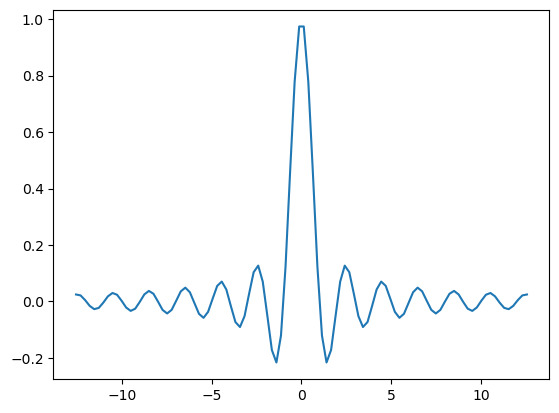

In [300]:
# =============== YOUR CODE GOES HERE =================
from matplotlib import pyplot
restored_data = np.loadtxt('file.out', delimiter=",")
x_data = restored_data[:,0]
y_data = restored_data[:,1]
# x_data = restored_data[0,:]
pyplot.plot(x_data, y_data)